In [2]:
import pandas as pd
df=pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_2025.csv')
print(df.head())

C:\Users\user\AppData\Local\Temp\ipykernel_16568\2368789346.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_2025.csv')


        transit_timestamp transit_mode station_complex_id  \
0  01/17/2025 07:00:00 PM         tram              TRAM1   
1  01/17/2025 06:00:00 AM         tram              TRAM1   
2  01/17/2025 07:00:00 AM         tram              TRAM1   
3  01/17/2025 07:00:00 AM         tram              TRAM2   
4  01/17/2025 08:00:00 AM         tram              TRAM1   

          station_complex    borough payment_method  \
0  RI Tramway (Manhattan)  Manhattan           omny   
1  RI Tramway (Manhattan)  Manhattan      metrocard   
2  RI Tramway (Manhattan)  Manhattan      metrocard   
3  RI Tramway (Roosevelt)  Manhattan      metrocard   
4  RI Tramway (Manhattan)  Manhattan           omny   

           fare_class_category  ridership  transfers   latitude  longitude  \
0              OMNY - Students          6          1  40.761337  -73.96416   
1        Metrocard - Fair Fare          1          0  40.761337  -73.96416   
2            Metrocard - Other          1          0  40.761337  -73

In [3]:
df.describe()

,ridership,transfers,latitude,longitude
count,1.107284e+07,1.107284e+07,1.107284e+07,1.107284e+07
mean,4.205640e+01,1.891140e+00,4.073482e+01,-7.393742e+01
std,1.870775e+02,1.263056e+01,7.698148e-02,5.332741e-02
min,1.000000e+00,0.000000e+00,4.057613e+01,-7.407484e+01
25%,3.000000e+00,0.000000e+00,4.067937e+01,-7.398163e+01
50%,9.000000e+00,0.000000e+00,4.072652e+01,-7.394765e+01
75%,2.500000e+01,1.000000e+00,4.079502e+01,-7.390177e+01
max,1.739100e+04,1.550000e+03,4.090313e+01,-7.375540e+01


In [4]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_16568\4141244490.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["transit_timestamp"] = pd.to_datetime(df["transit_timestamp"])


Ən sıx saatlar:
hour
17    44620493
8     38733030
16    38193355
18    34315259
15    34192149
Name: ridership, dtype: int64


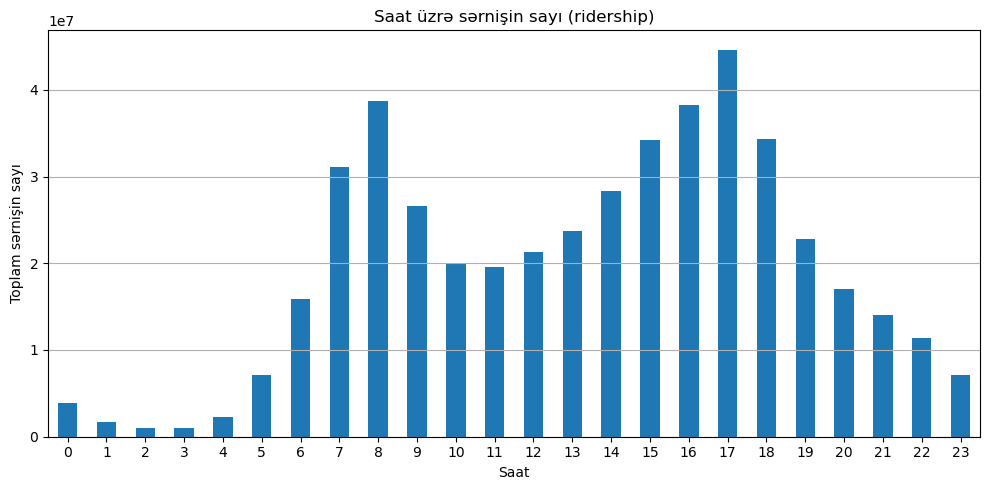

In [5]:
import matplotlib.pyplot as plt

# Tarix və saat formatına çeviririk
df["transit_timestamp"] = pd.to_datetime(df["transit_timestamp"])
df["hour"] = df["transit_timestamp"].dt.hour

# Saat üzrə sərnişin sayını toplayırıq
hourly_ridership = df.groupby("hour")["ridership"].sum().sort_values(ascending=False)

# Ən sıx 5 saatı göstər
print("Ən sıx saatlar:")
print(hourly_ridership.head(5))

# Vizual göstəriş
hourly_ridership.sort_index().plot(kind="bar", figsize=(10,5), title="Saat üzrə sərnişin sayı (ridership)")
plt.xlabel("Saat")
plt.ylabel("Toplam sərnişin sayı")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [8]:
import folium

# Ridership-ləri nömrəyə çevir
df.loc[:, 'ridership'] = pd.to_numeric(df['ridership'], errors='coerce')
df = df.dropna(subset=["ridership"])

# Xəritənin mərkəzini təyin et (orta nöqtə kimi)
center_lat = df["latitude"].mean()
center_lon = df["longitude"].mean()

# Xəritəni yarat
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Hər stansiya üçün marker əlavə et
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=max(2, min(row["ridership"] / 5, 15)),  # ridership-ə əsaslanan ölçü
        popup=f"Stansiya: {row['station_complex']}<br>Riders: {row['ridership']}",
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(m)

# Xəritəni HTML kimi yadda saxla
m.save("nyc_subway_ridership_map1.html")

In [6]:
payment_summary = df.groupby("payment_method")["ridership"].sum().sort_values(ascending=False)
payment_summary

payment_method
omny         325107160
metrocard    140576850
Name: ridership, dtype: int64

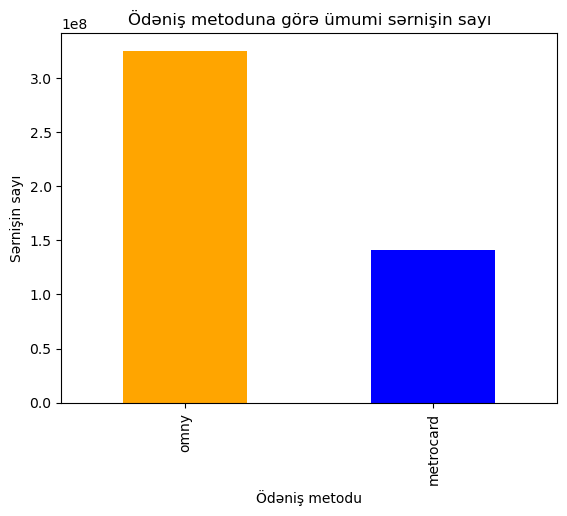

In [7]:
payment_summary.plot(kind="bar", color=["orange", "blue"])
plt.title("Ödəniş metoduna görə ümumi sərnişin sayı")
plt.xlabel("Ödəniş metodu")
plt.ylabel("Sərnişin sayı")
plt.show()

In [10]:
top_stations = df.groupby("station_complex")["ridership"].sum().sort_values(ascending=False).head(10)
top_stations

station_complex
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      17151732
Grand Central-42 St (S,4,5,6,7)                       12777729
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                      9277419
14 St-Union Sq (L,N,Q,R,W,4,5,6)                       8703146
Fulton St (A,C,J,Z,2,3,4,5)                            7168354
34 St-Penn Station (A,C,E)                             7013899
34 St-Penn Station (1,2,3)                             6448297
59 St-Columbus Circle (A,B,C,D,1)                      6253393
Flushing-Main St (7)                                   5460276
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)     5287384
Name: ridership, dtype: int64

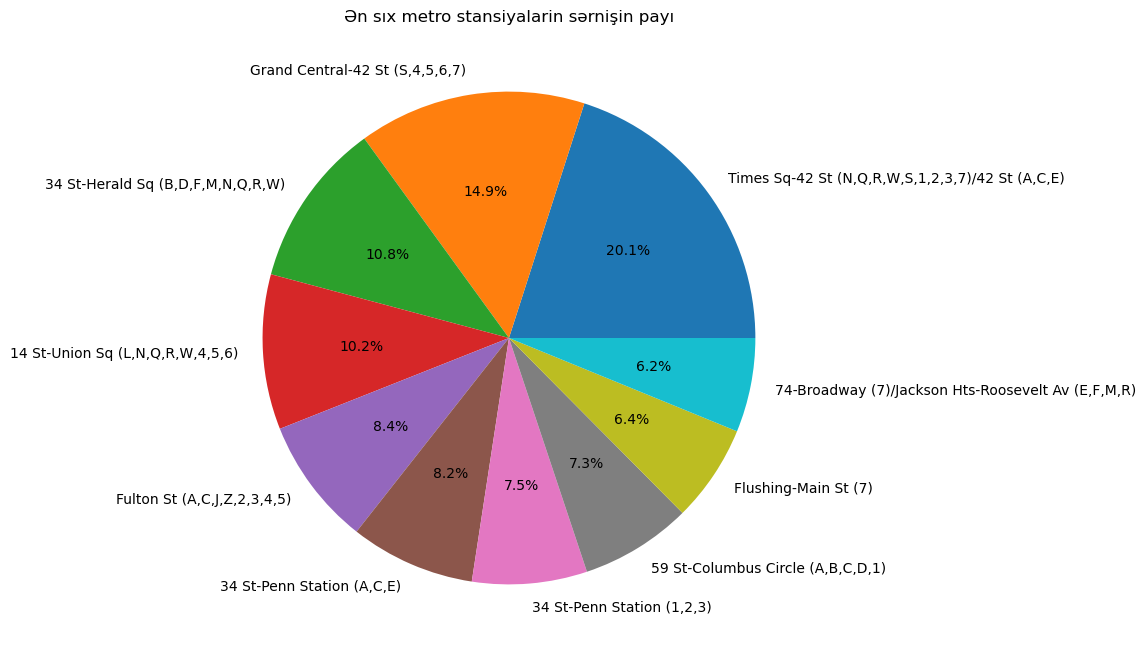

In [11]:
top_stations.plot(
    kind="pie", 
    y="ridership", 
    autopct="%1.1f%%", 
    figsize=(8,8), 
    legend=False,
    title="Ən sıx metro stansiyalarin sərnişin payı"
)
plt.ylabel("")  # Y oxunu sil
plt.show()

In [12]:
df["transit_timestamp"] = pd.to_datetime(df["transit_timestamp"])
df["day_of_week"] = df["transit_timestamp"].dt.day_name()
day_summary = df.groupby("day_of_week")["ridership"].sum()
day_summary

day_of_week
Friday       73023060
Monday       69035249
Saturday     50039006
Sunday       38435435
Thursday     78901831
Tuesday      79032899
Wednesday    77216530
Name: ridership, dtype: int64

In [13]:
fare_summary = df.groupby('fare_class_category')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)
print("Fare class category üzrə ümumi ridership:")
fare_summary

Fare class category üzrə ümumi ridership:


,fare_class_category,ridership
8,OMNY - Full Fare,278276767
1,Metrocard - Full Fare,42214195
11,OMNY - Students,32372820
5,Metrocard - Unlimited 30-Day,29878843
6,Metrocard - Unlimited 7-Day,28492999
2,Metrocard - Other,15334360
0,Metrocard - Fair Fare,15120164
10,OMNY - Seniors & Disability,10733161
3,Metrocard - Seniors & Disability,9536190
9,OMNY - Other,2418904


In [14]:
# 3. Sosial kateqoriyaların filtirlənməsi və cəmi hesablanması
social_keywords = ['Students', 'Seniors', 'Fair Fare']
social_df = df[df['fare_class_category'].str.contains('|'.join(social_keywords), case=False, na=False)]
social_ridership_total = social_df['ridership'].sum()
print(f"Sosial kateqoriyalar üzrə ümumi ridership: {social_ridership_total}")

Sosial kateqoriyalar üzrə ümumi ridership: 69067942


In [16]:
df[['transfers', 'ridership']].corr()

,transfers,ridership
transfers,1.000000,0.355512
ridership,0.355512,1.000000


In [ ]:
import requests

# OpenWeatherMap API açarı
api_key = '4a3b80170ec1ec2c0706c7be6828ef0c'
city = 'New York'
latitude = 40.7128
longitude = -74.0060

# Tarixi API üçün formatda düzəlt
def get_weather_data(date, latitude, longitude, api_key):
    url = f"http://api.openweathermap.org/data/2.5/onecall/timemachine"
    params = {
        "lat": latitude,
        "lon": longitude,
        "dt": int(pd.to_datetime(date).timestamp()),  # Unix timestamp formatına çevir
        "appid": api_key,
        "units": "metric"
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Göstərilən hava məlumatlarını çıxar
    if response.status_code == 200:
        weather_data = {
            'date': date,
            'temperature': data['current']['temp'],
            'humidity': data['current']['humidity'],
            'weather': data['current']['weather'][0]['description']
        }
        return weather_data
    else:
        return None

# Tarixlər üzrə hava məlumatları
dates = pd.date_range('2025-01-01', '2025-12-31', freq='D')  # Məsələn, 2025-ci il
weather_records = []

for date in dates:
    weather = get_weather_data(date, latitude, longitude, api_key)
    if weather:
        weather_records.append(weather)

# DataFrame-ə çevir
weather_df = pd.DataFrame(weather_records)
weather_df.head()

In [18]:
wr=pd.read_csv('New York, NY, United Stat... 2025-01-01 to 2025-01-31.csv')
print(wr.head())

                          name    datetime  tempmax  tempmin  temp  \
0  New York, NY, United States  2025-01-01     10.4      5.1   7.8   
1  New York, NY, United States  2025-01-02      5.8      1.3   3.8   
2  New York, NY, United States  2025-01-03      3.5     -0.5   1.6   
3  New York, NY, United States  2025-01-04      0.4     -1.7  -0.5   
4  New York, NY, United States  2025-01-05      0.8     -2.0  -1.1   

   feelslikemax  feelslikemin  feelslike   dew  humidity  ...  solarenergy  \
0          10.4           0.6        5.2   2.2      69.7  ...          3.8   
1           1.3          -4.9       -0.8  -7.0      46.0  ...          5.4   
2           0.4          -5.4       -2.8  -8.6      47.3  ...          8.5   
3          -4.5          -7.6       -6.2 -13.1      38.6  ...          6.7   
4          -4.1          -8.0       -6.4 -12.0      43.6  ...          7.5   

   uvindex  severerisk              sunrise               sunset  moonphase  \
0        3         NaN  2025-01

In [20]:
# Tarix formatlarını uyğunlaşdır
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
df['date'] = df['transit_timestamp'].dt.date

wr['datetime'] = pd.to_datetime(wr['datetime'])
wr['date'] = wr['datetime'].dt.date

# Günə əsasən birləşdir
df_merged = pd.merge(df, wr, on='date', how='inner')

In [21]:
# Yağışlı günləri tap
df_merged['is_rainy'] = df_merged['conditions'].str.contains("Rain", case=False)

# Ortalama sərnişin sayı müqayisəsi
rainy_avg = df_merged[df_merged['is_rainy']]['ridership'].mean()
non_rainy_avg = df_merged[~df_merged['is_rainy']]['ridership'].mean()

print(f"Yağışlı günlərdə orta sərnişin sayı: {rainy_avg:.2f}")
print(f"Quru günlərdə orta sərnişin sayı: {non_rainy_avg:.2f}")

Yağışlı günlərdə orta sərnişin sayı: 34.20
Quru günlərdə orta sərnişin sayı: 43.59


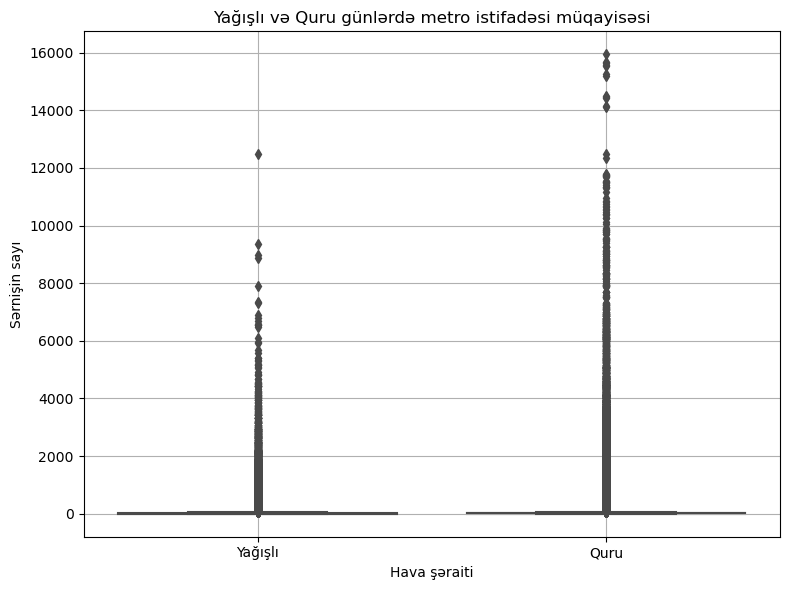

In [23]:
import seaborn as sns

# Vizuallaşma üçün məlumatları hazırlayaq
rainy_data = df_merged[df_merged['is_rainy']].copy()
non_rainy_data = df_merged[~df_merged['is_rainy']].copy()

# DataFrame yaradaraq etiket əlavə edirik
rainy_data['weather'] = 'Yağışlı'
non_rainy_data['weather'] = 'Quru'

# Birləşdirilmiş DataFrame
viz_df = pd.concat([rainy_data, non_rainy_data])

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=viz_df, x='weather', y='ridership', palette='Blues')
plt.title("Yağışlı və Quru günlərdə metro istifadəsi müqayisəsi")
plt.xlabel("Hava şəraiti")
plt.ylabel("Sərnişin sayı")
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
df_merged.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,is_rainy
0,2025-01-17 19:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Students,6,1,40.761337,...,5,NaN,2025-01-17T07:17:00,2025-01-17T16:55:59,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7...",False
1,2025-01-17 06:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Fair Fare,1,0,40.761337,...,5,NaN,2025-01-17T07:17:00,2025-01-17T16:55:59,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7...",False
2,2025-01-17 07:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Other,1,0,40.761337,...,5,NaN,2025-01-17T07:17:00,2025-01-17T16:55:59,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7...",False
3,2025-01-17 07:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Full Fare,8,0,40.757340,...,5,NaN,2025-01-17T07:17:00,2025-01-17T16:55:59,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7...",False
4,2025-01-17 08:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,omny,OMNY - Seniors & Disability,1,1,40.761337,...,5,NaN,2025-01-17T07:17:00,2025-01-17T16:55:59,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,F1417,KNYC,7...",False


In [30]:
df_merged.columns

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference',
       'hour', 'day_of_week', 'date', 'name', 'datetime', 'tempmax', 'tempmin',
       'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'is_rainy'],
      dtype='object')

In [31]:
# 1. Lazımi sütunları seç
subset = df_merged[["day_of_week", "is_rainy", "ridership"]].copy()

# 2. "is_rainy" dəyərlərini etiketlə (True → "Yağışlı", False → "Quru")
subset["hava_səraiti"] = subset["is_rainy"].map({True: "Yağışlı", False: "Quru"})

# 3. Ortalama sərnişin sayını qrupla
grouped = subset.groupby(["day_of_week", "hava_səraiti"])["ridership"].mean().reset_index()

# 4. Pivot cədvəl qur
comparison = grouped.pivot(index="day_of_week", columns="hava_səraiti", values="ridership")

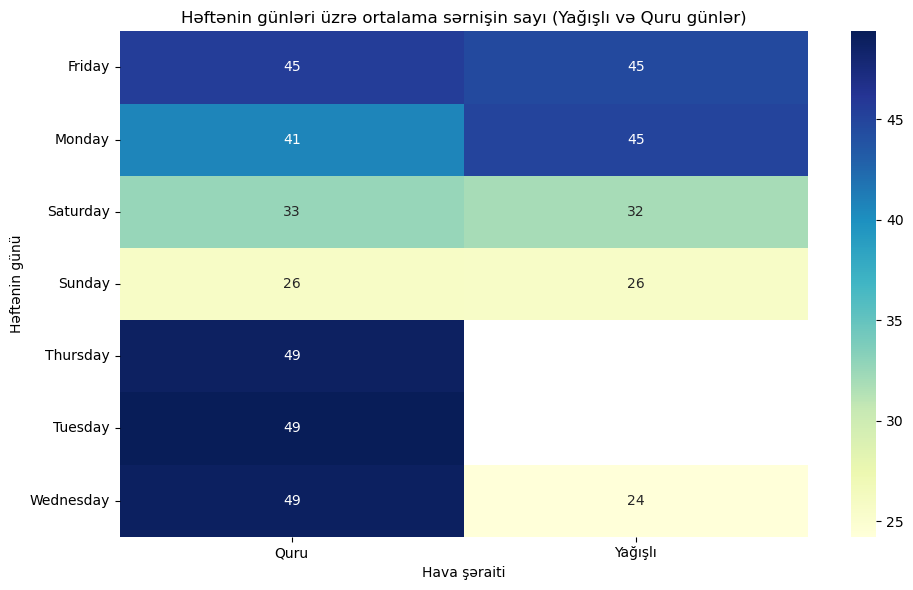

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(comparison, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Həftənin günləri üzrə ortalama sərnişin sayı (Yağışlı və Quru günlər)")
plt.ylabel("Həftənin günü")
plt.xlabel("Hava şəraiti")
plt.tight_layout()
plt.show()

In [41]:
corr_value = df_merged[["temp", "ridership"]].corr().iloc[0, 1]
print(f"Temperatur ilə sərnişin sayı arasındakı korrelyasiya: {corr_value:.2f}")

Temperatur ilə sərnişin sayı arasındakı korrelyasiya: -0.02
